In [23]:
import pandas as pd
import seaborn as sns

In [24]:
adds=pd.read_csv('Social_Network_Ads.csv')

In [25]:
adds.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [26]:
adds.drop('User ID',axis=1,inplace=True)

In [27]:
adds.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [28]:
gender=pd.get_dummies(adds['Gender'],drop_first=True)

In [29]:
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [30]:
adds=pd.concat([adds,gender],axis=1)

In [31]:
adds.head()

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


In [32]:
adds.drop('Gender',axis=1,inplace=True)

In [33]:
adds.corr()

,Age,EstimatedSalary,Purchased,Male
Age,1.000000,0.155238,0.622454,-0.073741
EstimatedSalary,0.155238,1.000000,0.362083,-0.060435
Purchased,0.622454,0.362083,1.000000,-0.042469
Male,-0.073741,-0.060435,-0.042469,1.000000


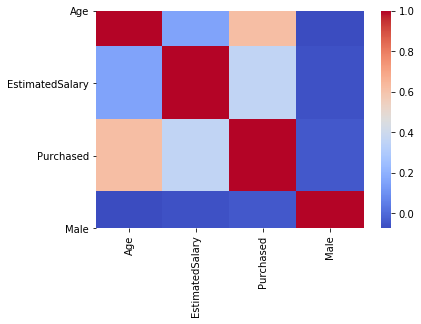

In [35]:
sns.heatmap(adds.corr(),cmap='coolwarm')

In [37]:
adds.drop('Male',axis=1,inplace=True)#relation bet purchased and male less corr.(blue)

In [38]:
adds.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
ss=StandardScaler()

In [43]:
scaled_array=ss.fit_transform(adds.drop('Purchased',axis=1))

In [44]:
scaled_array

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [46]:
x=pd.DataFrame(data=scaled_array,columns=adds.columns[0:2])

In [47]:
x

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [48]:
y=adds['Purchased']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.3)

In [52]:
X_train.shape

(280, 2)

In [53]:
X_test.shape

(120, 2)

In [54]:
y_train.shape

(280,)

In [55]:
y_test.shape

(120,)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lg=LogisticRegression()

In [58]:
lg.fit(X_train,y_train)

/Users/sandip/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
ypred=lg.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
cm=confusion_matrix(y_test,ypred)

In [63]:
cm

array([[72,  9],
       [13, 26]])

In [64]:
(72+26)/120

0.8166666666666667

In [65]:
lg.score(X_test,y_test)

0.8166666666666667

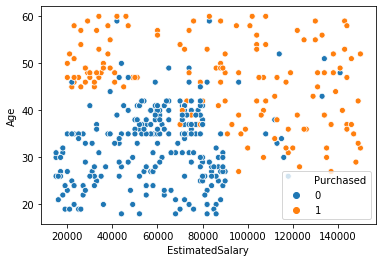

In [68]:
#svm=work for small amount of data.
sns.scatterplot(x='EstimatedSalary',y='Age',data=adds,hue='Purchased')

In [70]:
from sklearn.svm import SVC

In [71]:
classifier=SVC()

In [72]:
classifier.fit(X_train,y_train)

/Users/sandip/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [75]:
ypred1=classifier.predict(X_test)

In [76]:
cm1=confusion_matrix(y_test,ypred1)

In [77]:
cm1

array([[73,  8],
       [ 3, 36]])

In [80]:
(73+36)/120

0.9083333333333333

#### print(classification_report(y_test,ypred1))

In [ ]:
#precision-accuracy of model on specific class atual
#recall=probability will predict